In [24]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import holidays 

In [25]:
velib = pl.read_csv("C:/Users/pc/Desktop/historique_stations.csv")
velib.head()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2020-11-26T12:59Z""",35,4,5,"""Benjamin Godard - Victor Hugo""","""48.86598,2.27572""",true
"""2020-11-26T12:59Z""",55,23,4,"""André Mazet - Saint-André des …","""48.85376,2.33910""",true
"""2020-11-26T12:59Z""",20,0,0,"""Charonne - Robert et Sonia Del…","""48.85591,2.39257""",true
"""2020-11-26T12:59Z""",21,0,1,"""Toudouze - Clauzel""","""48.87930,2.33736""",true
"""2020-11-26T12:59Z""",30,3,1,"""Mairie du 12ème""","""48.84086,2.38755""",true


In [26]:
velib.tail()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2021-04-09T14:37Z""",38,4,2,"""Général Michel Bizot - Claude …","""48.83481,2.40093""",true
"""2021-04-09T14:37Z""",20,2,1,"""Ivry - Baudricourt""","""48.82470,2.36311""",true
"""2021-04-09T14:37Z""",39,17,0,"""Saint-Mandé - Docteur Arnold N…","""48.84463,2.40495""",true
"""2021-04-09T14:37Z""",21,12,4,"""Saint-Marcel - Hôpital""","""48.83950,2.36099""",true
"""2021-04-09T14:37Z""",36,12,5,"""Guynemer - Jardin du Luxembour…","""48.84661,2.33255""",true


In [27]:
# statistical summary
velib.describe()

statistic,datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,str,f64,f64,f64,str,str,f64
"""count""","""10986730""",1.098673e7,1.098673e7,1.098673e7,"""10986730""","""10986730""",1.098673e7
"""null_count""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,31.465766,7.845411,3.502016,null,null,0.980206
"""std""",null,12.018012,9.007581,3.144555,null,null,null
"""min""","""2020-11-26T12:59Z""",0.0,0.0,0.0,""" Jean Bleuzen - Square du 11 N…","""48.76462,2.40712""",0.0
"""25%""",null,23.0,1.0,1.0,null,null,null
"""50%""",null,30.0,5.0,3.0,null,null,null
"""75%""",null,37.0,11.0,5.0,null,null,null
"""max""","""2021-04-09T14:37Z""",74.0,73.0,41.0,"""Île de la Jatte""","""48.94702,2.25690""",1.0


In [28]:
# Object for public holidays in France
fr_holidays = holidays.FR()

def is_holiday(d: pl.date) -> bool:
    return d in fr_holidays

In [29]:
velib['operative'].value_counts()

operative,count
bool,u32
true,10769264
false,217466


In [30]:
velib = velib.filter(pl.col("operative") == True)

In [31]:
velib.shape

(10769264, 7)

In [32]:
def preprocess_velib_data(velib: pl.DataFrame) -> pl.DataFrame:
    """
    Preprocesses Velib bike sharing data by:
    1. Parsing datetime column into date, time and weekday components
    2. Calculating total available bikes and free terminals
    3. Extracting latitude and longitude from station_geo
    
    Args:
        velib (pl.DataFrame): Raw Velib dataframe
        
    Returns:
        pl.DataFrame: Preprocessed Velib dataframe with additional columns
    """
    # filter out non-operative stations
    velib = velib.filter(pl.col("operative") == True)
    
    # parse datetime column and extract date and time
    velib = velib.with_columns(
        # Step 1: Parse the string into a Datetime object
        # Polars' default parser usually handles ISO 8601 format (T separator, Z for UTC)
        datetime = pl.col("datetime").str.to_datetime()
    ).with_columns(
        # Step 2: Extract date features from the new Datetime object
        date = pl.col("datetime").dt.date(),
        is_holiday = pl.col("datetime").is_in(fr_holidays),
        weekday = pl.col("datetime").dt.weekday(),
        week_of_year = pl.col("datetime").dt.week(),
        time = pl.col("datetime").dt.time()
    )

    # create new columns
    total_available = pl.col("available_mechanical") + pl.col("available_electrical")

    velib = velib.with_columns(
        total_available = total_available,
        free_terminals = pl.col("capacity") - total_available,
    )
    
    return velib

velib = preprocess_velib_data(velib)
velib.sample(10)

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative,date,is_holiday,weekday,week_of_year,time,total_available,free_terminals
"datetime[μs, UTC]",i64,i64,i64,str,str,bool,date,bool,i8,i8,time,i64,i64
2021-03-17 20:41:00 UTC,12,2,1,"""Messine - Place Du Pérou""","""48.87545,2.31551""",true,2021-03-17,false,3,11,20:41:00,3,9
2021-03-17 03:16:00 UTC,59,11,5,"""Alexandre Dumas - Voltaire""","""48.85289,2.38915""",true,2021-03-17,false,3,11,03:16:00,16,43
2021-01-05 11:20:00 UTC,20,1,2,"""Gare des Vallées""","""48.91318,2.25773""",true,2021-01-05,false,2,1,11:20:00,3,17
2021-01-19 02:50:00 UTC,31,11,6,"""Jean Jaurès - Reine""","""48.84010,2.23987""",true,2021-01-19,false,2,3,02:50:00,17,14
2020-12-15 11:41:00 UTC,33,0,2,"""Saint-Fargeau - Mortier""","""48.87267,2.40791""",true,2020-12-15,false,2,51,11:41:00,2,31
2020-11-27 13:32:00 UTC,40,3,4,"""Gare RER de Saint-Denis""","""48.93554,2.34715""",true,2020-11-27,false,5,48,13:32:00,7,33
2021-02-26 09:58:00 UTC,31,25,3,"""Saint-Germain - Thenard""","""48.85057,2.34710""",true,2021-02-26,false,5,8,09:58:00,28,3
2020-11-28 02:26:00 UTC,15,6,2,"""Mornay - Sully""","""48.84970,2.36446""",true,2020-11-28,false,6,48,02:26:00,8,7
2021-03-31 16:48:00 UTC,50,0,4,"""Grands Moulins de Pantin""","""48.89738,2.39600""",true,2021-03-31,false,3,13,16:48:00,4,46


In [33]:
print(velib.filter(pl.col("is_holiday")==True))

shape: (0, 14)
┌────────────┬──────────┬────────────┬────────────┬───┬────────────┬──────┬────────────┬───────────┐
│ datetime   ┆ capacity ┆ available_ ┆ available_ ┆ … ┆ week_of_ye ┆ time ┆ total_avai ┆ free_term │
│ ---        ┆ ---      ┆ mechanical ┆ electrical ┆   ┆ ar         ┆ ---  ┆ lable      ┆ inals     │
│ datetime[μ ┆ i64      ┆ ---        ┆ ---        ┆   ┆ ---        ┆ time ┆ ---        ┆ ---       │
│ s, UTC]    ┆          ┆ i64        ┆ i64        ┆   ┆ i8         ┆      ┆ i64        ┆ i64       │
╞════════════╪══════════╪════════════╪════════════╪═══╪════════════╪══════╪════════════╪═══════════╡
└────────────┴──────────┴────────────┴────────────┴───┴────────────┴──────┴────────────┴───────────┘


In [34]:
# Extract hour from time column
velib = velib.with_columns(
    hour = pl.col("time").cast(str).str.slice(0, 2).cast(pl.Int32)
)

# Group by date, hour, and station, taking last value in each hour
velib = velib.group_by(["date", "hour", "station_name"]).agg([
    pl.col("weekday").last(),
    pl.col("week_of_year").last(),
    pl.col("is_holiday").last(),
    pl.col("total_available").last(),
    pl.col("available_mechanical").last(), 
    pl.col("available_electrical").last(),
    pl.col("free_terminals").last()
])

In [35]:
# drop datetime column and reorder columns
new_velib = velib.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour",
    "station_name",
    "total_available",
    "available_mechanical",
    "available_electrical",
    "free_terminals"
]).sort(["date", "hour", "station_name"])

new_velib.sample(10)

date,is_holiday,week_of_year,weekday,hour,station_name,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,str,i64,i64,i64,i64
2021-02-03,false,5,3,11,"""Saint-Mandé - Docteur Arnold N…",12,6,6,27
2020-12-10,false,50,4,16,"""Porte d'Orléans""",2,0,2,46
2020-12-22,false,52,2,15,"""Franciade - Gabriel Péri""",1,0,1,25
2020-12-07,false,50,1,8,"""Colonel Pierre Avia""",17,17,0,12
2020-12-08,false,50,2,7,"""Gambetta - Saint Fargeau""",0,0,0,24
2021-02-14,false,6,7,21,"""Blancs-Manteaux - Archives """,22,15,7,7
2020-12-24,false,52,4,2,"""Richard Lenoir - Republique""",4,3,1,54
2021-02-25,false,8,4,0,"""Saint-Mandé - Fabre d'Eglantin…",8,7,1,26
2021-01-07,false,1,4,19,"""Metz - Faubourg Saint-Denis""",38,34,4,10


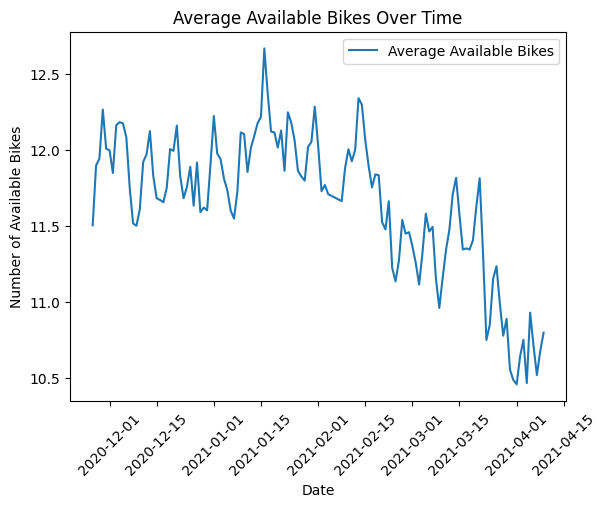

In [36]:
# Group by date and calculate mean total_available across all stations
daily_avg = velib.group_by("date").agg(avg_available=pl.col("total_available").mean()).sort("date")

plt.plot(daily_avg["date"], daily_avg["avg_available"], label='Average Available Bikes')
plt.xlabel('Date')
plt.ylabel('Number of Available Bikes')
plt.title('Average Available Bikes Over Time')
plt.xticks(rotation=45)
plt.legend()

In [37]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)


In [38]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)

new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.String).cast(pl.Categorical)
)

# Replace station_name with station_id and reorder columns
new_df = new_df.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour", 
    "station_id",
    "total_available",
    "available_mechanical", 
    "available_electrical",
    "free_terminals"
])

print("Station ID Mapping:")
print(station_mapping.head())
print("\nUpdated Velib Data:")
new_df.head()

Station ID Mapping:
shape: (5, 2)
┌────────────┬─────────────────────────────────┐
│ station_id ┆ station_name                    │
│ ---        ┆ ---                             │
│ u32        ┆ str                             │
╞════════════╪═════════════════════════════════╡
│ 0          ┆  Jean Bleuzen - Square du 11 N… │
│ 1          ┆  Place Léon Gambetta            │
│ 2          ┆ 11 Novembre 1918 - 8 Mai 1945   │
│ 3          ┆ 18 juin 1940 - Buzenval         │
│ 4          ┆ Abbeville - Faubourg Poissonni… │
└────────────┴─────────────────────────────────┘

Updated Velib Data:


date,is_holiday,week_of_year,weekday,hour,station_id,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,cat,i64,i64,i64,i64
2020-12-27,false,52,7,10,"""1293""",2,2,0,17
2021-02-26,false,8,5,18,"""138""",9,8,1,8
2021-03-23,false,12,2,22,"""1342""",5,5,0,20
2021-04-06,false,14,2,8,"""330""",17,14,3,39
2020-12-12,false,50,6,9,"""449""",0,0,0,18


In [39]:
# Sort by station_id, date and hour to ensure proper lag calculation
df_sorted = new_df.sort(["station_id", "date", "hour"])

# Get unique station IDs
unique_stations = df_sorted.get_column("station_id").unique().to_list()

# Create list to store DataFrames with lagged features for each station
station_lag_dfs = []

# For each station, create lagged features
for station_id in unique_stations:
    # Filter data for current station
    station_df = df_sorted.filter(pl.col("station_id") == station_id)
    
    # Create lag columns for total_available
    lag_columns = []
    for i in range(1, 25):
        lag_columns.append(
            pl.col("total_available").shift(i).alias(f"total_available_lag_{i}h")
        )
    
    # Add lag columns to station DataFrame
    station_with_lags = station_df.with_columns(lag_columns).select(
        ["station_id", "date", "week_of_year", "weekday", "hour", "total_available"] + 
        [f"total_available_lag_{i}h" for i in range(1, 25)]
    )
    
    # Drop rows with any null values (first 24 hours)
    station_with_lags = station_with_lags.drop_nulls()
    
    if len(station_with_lags) > 0:  # Only append if we have data after dropping nulls
        station_lag_dfs.append(station_with_lags)


In [40]:
idx = np.random.randint(0, len(station_lag_dfs))
print(f"Created lag features for {len(station_lag_dfs)} stations")
print(f"\nExample of lagged features for station {idx}:")
print(f"Shape of the station's DataFrame: {station_lag_dfs[idx].shape}")
station_lag_dfs[idx].head(10)

Created lag features for 1379 stations

Example of lagged features for station 648:
Shape of the station's DataFrame: (3056, 30)


station_id,date,week_of_year,weekday,hour,total_available,total_available_lag_1h,total_available_lag_2h,total_available_lag_3h,total_available_lag_4h,total_available_lag_5h,total_available_lag_6h,total_available_lag_7h,total_available_lag_8h,total_available_lag_9h,total_available_lag_10h,total_available_lag_11h,total_available_lag_12h,total_available_lag_13h,total_available_lag_14h,total_available_lag_15h,total_available_lag_16h,total_available_lag_17h,total_available_lag_18h,total_available_lag_19h,total_available_lag_20h,total_available_lag_21h,total_available_lag_22h,total_available_lag_23h,total_available_lag_24h
cat,date,i8,i8,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""380""",2020-11-27,48,5,12,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16,21,18,16,16,15
"""380""",2020-11-27,48,5,13,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16,21,18,16,16
"""380""",2020-11-27,48,5,14,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16,21,18,16
"""380""",2020-11-27,48,5,15,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16,21,18
"""380""",2020-11-27,48,5,16,10,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16,21
"""380""",2020-11-27,48,5,17,8,10,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12,16
"""380""",2020-11-27,48,5,18,5,8,10,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7,12
"""380""",2020-11-27,48,5,19,2,5,8,10,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6,7
"""380""",2020-11-27,48,5,20,2,2,5,8,10,9,10,10,9,8,8,7,4,2,4,4,5,5,5,5,5,5,6,6,6


In [41]:
# Concatenate all station DataFrames vertically
combined_df = pl.concat(station_lag_dfs)
combined_df = combined_df.sort(["date", "hour"])

print(f"Shape of combined DataFrame: {combined_df.shape}")
print("\nFirst few rows of combined DataFrame:")
combined_df.head(10)
print(combined_df.dtypes)

Shape of combined DataFrame: (4172748, 30)

First few rows of combined DataFrame:
[Categorical(ordering='physical'), Date, Int8, Int8, Int32, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64]


In [42]:
# *** Convert to Pandas before splitting and training ***
combined_df_pd = combined_df.to_pandas()
# use_pyarrow_extension_array=True could be more efficient and preserves nullable types better

# Now proceed with the Pandas DataFrame as before:
# Verify the dtype in Pandas (should be 'category')
# print(combined_df_pd.dtypes)

if 'station_id' in combined_df_pd.columns:
     print(f"Polars 'station_id' dtype: {combined_df['station_id'].dtype}") # Should be 'category
     print(f"Pandas 'station_id' dtype: {combined_df_pd['station_id'].dtype}") # Should be 'category'

Polars 'station_id' dtype: Categorical(ordering='physical')
Pandas 'station_id' dtype: category


In [43]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [44]:
X = combined_df_pd.drop(['date', 'total_available'], axis=1)
y = combined_df_pd["total_available"]
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (4172748, 28)
y shape: (4172748,)


In [45]:
ts_cv = TimeSeriesSplit(
    n_splits=10,  # to keep the notebook fast enough on common laptops
    gap=48,  # 2 days data gap between train and test
    max_train_size=40000,  # keep train sets of comparable sizes
    test_size=5000,  # for 2 or 3 digits of precision in scores
)
all_splits = list(ts_cv.split(X, y))

In [46]:
# Example LightGBM parameters (use your tuned/chosen ones)
# Using objective='regression_l1' (MAE) as discussed for better zero handling
lgbm_params = {
    'objective': 'regression_l1',  # Changed to MAE objective
    'metric': 'mae',               # Monitor MAE
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 428 # Use the best_iteration found earlier, or tune this
    # 'n_jobs': -1 # Use all available CPU cores
}

# Example XGBoost parameters (use your tuned/chosen ones)
xgb_params = {
    'objective': 'reg:squarederror', # Or 'reg:absoluteerror' for MAE
    'eval_metric': 'mae',           # Monitor MAE
    'tree_method': 'hist',
    'enable_categorical': True,    # If using categoricals
    'learning_rate': 0.05,
    'max_depth': 5,                # XGBoost often uses depth, not num_leaves directly
    'subsample': 0.9,              # Similar to bagging_fraction
    'colsample_bytree': 0.9,       # Similar to feature_fraction
    'random_state': 42,
    'n_estimators': 400,           # Adjust as needed, potentially based on early stopping
    'n_jobs': -1
}

In [47]:
# --- LightGBM Cross-Validation ---
lgbm_oof_predictions = np.zeros(len(X)) # Array to store out-of-fold predictions
lgbm_test_indices = [] # Keep track of which indices were used in test sets
lgbm_scores_rmse = []
lgbm_scores_mae = []

print("Starting LightGBM Cross-Validation...")
for fold, (train_idx, test_idx) in enumerate(all_splits):
    print(f"  Fold {fold+1}/{len(all_splits)}...")

    # --- Prepare data for this fold ---
    # Use .iloc because train_idx, test_idx are integer indices
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[test_idx], y.iloc[test_idx]

    # --- Initialize and Train Model (new instance each fold!) ---
    model_lgbm = lgb.LGBMRegressor(**lgbm_params)
    model_lgbm.fit(X_train_fold, y_train_fold,
                   # eval_set=[(X_test_fold, y_test_fold)], # Optional: can monitor but avoid early stopping here
                   # callbacks=[lgb.early_stopping(10)] # Generally avoid early stopping within CV loop directly
                   ) # Categoricals handled automatically if dtype is 'category'

    # --- Predict on Test Fold ---
    predictions_fold_float = model_lgbm.predict(X_test_fold)

    # --- Post-process (Round for integer prediction) ---
    final_predictions_fold = np.maximum(0, np.round(predictions_fold_float).astype(int))

    # --- Store OOF preds (use the rounded ones if evaluating integer performance) ---
    lgbm_oof_predictions[test_idx] = final_predictions_fold
    lgbm_test_indices.extend(test_idx) # Collect test indices

    # --- Evaluate ---
    rmse = root_mean_squared_error(y_test_fold, final_predictions_fold)
    mae = mean_absolute_error(y_test_fold, final_predictions_fold)
    lgbm_scores_rmse.append(rmse)
    lgbm_scores_mae.append(mae)
    print(f"    Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("\nLightGBM CV Summary:")
print(f"  Mean RMSE: {np.mean(lgbm_scores_rmse):.4f} +/- {np.std(lgbm_scores_rmse):.4f}")
print(f"  Mean MAE:  {np.mean(lgbm_scores_mae):.4f} +/- {np.std(lgbm_scores_mae):.4f}")

Starting LightGBM Cross-Validation...
  Fold 1/10...
    Fold 1 RMSE: 1.3355, MAE: 0.6804
  Fold 2/10...
    Fold 2 RMSE: 3.0640, MAE: 2.1216
  Fold 3/10...
    Fold 3 RMSE: 2.4935, MAE: 1.7938
  Fold 4/10...
    Fold 4 RMSE: 2.8855, MAE: 2.1088
  Fold 5/10...
    Fold 5 RMSE: 2.7767, MAE: 1.9122
  Fold 6/10...
    Fold 6 RMSE: 1.7158, MAE: 0.9908
  Fold 7/10...
    Fold 7 RMSE: 1.2749, MAE: 0.4474
  Fold 8/10...
    Fold 8 RMSE: 2.3681, MAE: 1.4930
  Fold 9/10...
    Fold 9 RMSE: 2.6918, MAE: 1.8740
  Fold 10/10...
    Fold 10 RMSE: 2.7626, MAE: 1.9374

LightGBM CV Summary:
  Mean RMSE: 2.3368 +/- 0.6223
  Mean MAE:  1.5359 +/- 0.5806


Training the model with MAE had a lower error std than with RMSE.

In [48]:
# --- XGBoost Cross-Validation (Similar Loop) ---
xgb_oof_predictions = np.zeros(len(X))
xgb_test_indices = []
xgb_scores_rmse = []
xgb_scores_mae = []

print("\nStarting XGBoost Cross-Validation...")
for fold, (train_idx, test_idx) in enumerate(ts_cv.split(X, y)):
    print(f"  Fold {fold+1}/{ts_cv.n_splits}...")
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[test_idx], y.iloc[test_idx]

    model_xgb = xgb.XGBRegressor(**xgb_params)
    model_xgb.fit(X_train_fold, y_train_fold) # Assumes X_* have category dtype if enable_categorical=True

    predictions_fold_float = model_xgb.predict(X_test_fold)
    final_predictions_fold = np.maximum(0, np.round(predictions_fold_float).astype(int))

    xgb_oof_predictions[test_idx] = final_predictions_fold
    xgb_test_indices.extend(test_idx)

    rmse = root_mean_squared_error(y_test_fold, final_predictions_fold)
    mae = mean_absolute_error(y_test_fold, final_predictions_fold)
    xgb_scores_rmse.append(rmse)
    xgb_scores_mae.append(mae)
    print(f"    Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("\nXGBoost CV Summary:")
print(f"  Mean RMSE: {np.mean(xgb_scores_rmse):.4f} +/- {np.std(xgb_scores_rmse):.4f}")
print(f"  Mean MAE:  {np.mean(xgb_scores_mae):.4f} +/- {np.std(xgb_scores_mae):.4f}")

# --- Optional: Analyze OOF Predictions ---
# You can now compare the overall performance using the OOF predictions vs actuals
# Ensure you only evaluate on indices that were part of *any* test set
# unique_test_indices = sorted(list(set(lgbm_test_indices))) # Or xgb_test_indices
# overall_mae_lgbm = mean_absolute_error(y.iloc[unique_test_indices], lgbm_oof_predictions[unique_test_indices])
# print(f"\nOverall OOF MAE for LightGBM: {overall_mae_lgbm:.4f}")


Starting XGBoost Cross-Validation...
  Fold 1/10...
    Fold 1 RMSE: 1.4072, MAE: 0.8382
  Fold 2/10...
    Fold 2 RMSE: 3.0526, MAE: 2.1518
  Fold 3/10...
    Fold 3 RMSE: 2.6250, MAE: 1.8912
  Fold 4/10...
    Fold 4 RMSE: 2.9650, MAE: 2.1634
  Fold 5/10...
    Fold 5 RMSE: 2.9300, MAE: 2.1026
  Fold 6/10...
    Fold 6 RMSE: 1.8949, MAE: 1.2258
  Fold 7/10...
    Fold 7 RMSE: 1.5078, MAE: 0.7892
  Fold 8/10...
    Fold 8 RMSE: 2.3206, MAE: 1.5110
  Fold 9/10...
    Fold 9 RMSE: 2.8781, MAE: 2.0188
  Fold 10/10...
    Fold 10 RMSE: 2.8335, MAE: 2.0216

XGBoost CV Summary:
  Mean RMSE: 2.4415 +/- 0.5932
  Mean MAE:  1.6714 +/- 0.5145


Same observation for XGBoost but LightGBM showed lower error means and relatively close stds.

In [49]:
# Define the split point (e.g., 80% for training)
split_ratio = 0.95
split_index = int(len(X) * split_ratio)

# Split the data temporally
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3964110, 28), y_train shape: (3964110,)
X_test shape: (208638, 28), y_test shape: (208638,)


In [50]:
# Create LightGBM Dataset objects
# It automatically detects 'category' dtype columns
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False) # Keep raw data if needed later
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

# Define parameters
params = {
    'objective': 'regression_l1',  
    'metric': 'mae',              
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 400,     # Use the best_iteration found earlier, or tune this
    'n_jobs': -1 # Use all available CPU cores
}

# Train the model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000, # Max rounds
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train', 'eval'],
                callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# Predict
predictions = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Training until validation scores don't improve for 10 rounds
[50]	train's l1: 1.88344	eval's l1: 1.71129
[100]	train's l1: 1.48566	eval's l1: 1.51331
[150]	train's l1: 1.42322	eval's l1: 1.48666
[200]	train's l1: 1.40185	eval's l1: 1.47399
[250]	train's l1: 1.38716	eval's l1: 1.46558
[300]	train's l1: 1.37669	eval's l1: 1.46089
[350]	train's l1: 1.36924	eval's l1: 1.45664
[400]	train's l1: 1.3634	eval's l1: 1.45398
Did not meet early stopping. Best iteration is:
[400]	train's l1: 1.3634	eval's l1: 1.45398


In [51]:
import numpy as np

rounded_predictions = np.round(predictions).astype(int)
# Ensure predictions are not negative
final_predictions = np.maximum(0, rounded_predictions)

# Now 'final_predictions' contains non-negative integers
print(final_predictions[:20]) # Print some examples

[ 4  8 12  9  4  1 13 11 10 13  5  8  7 31 10  5  7  4  9 19]


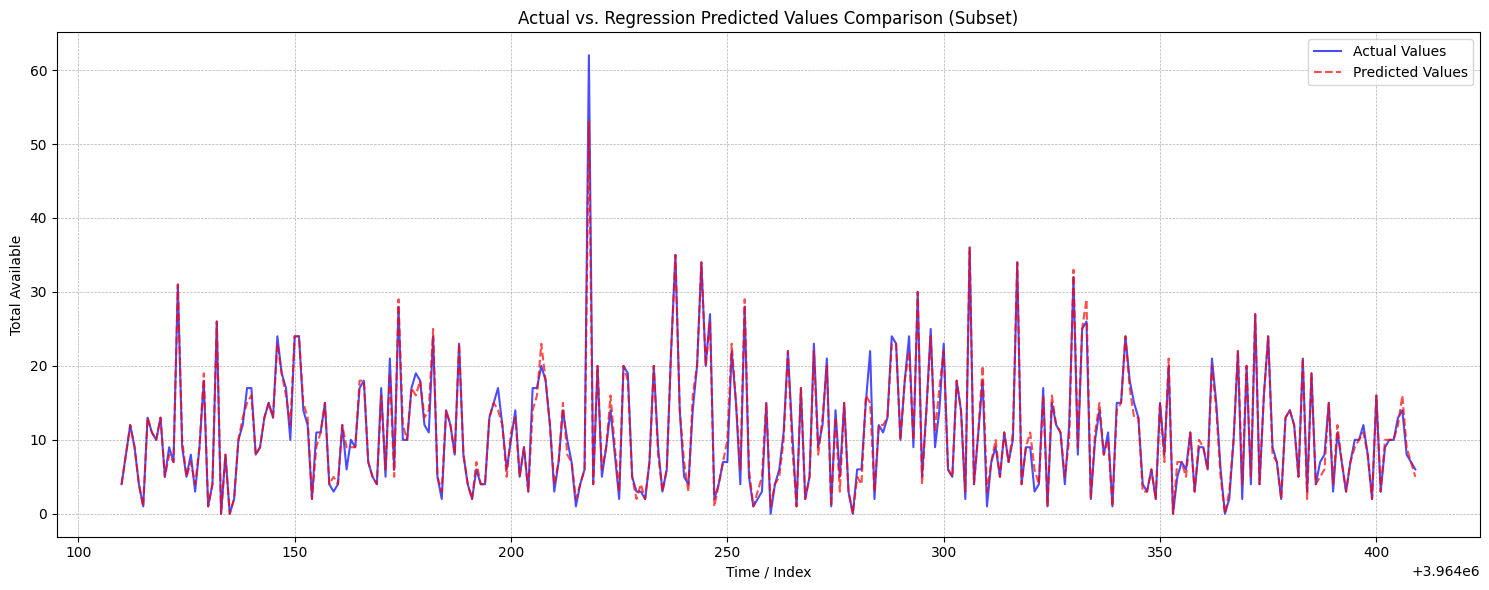

In [52]:
import pandas as pd

plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 300 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. Regression Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

# --- Show the plot ---
plt.show()

In [53]:
# --- In your parameter definition ---
params_poisson = {
    'objective': 'poisson', # CHANGE HERE
    'metric': 'mae',       # Monitor RMSE
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 400,     # Use the best_iteration found earlier, or tune this
    'n_jobs': -1 # Use all available CPU cores
}

# --- Train using the new parameters ---
# (Assuming lgb_train, lgb_eval are already created as before)
print("\nStarting LightGBM training with Poisson objective...")
gbm_poisson = lgb.train(params_poisson,
                        lgb_train,
                        num_boost_round=1000,
                        valid_sets=[lgb_train, lgb_eval],
                        valid_names=['train', 'eval'],
                        callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# --- Predict ---
# The output is the expected rate (lambda), which is a non-negative float
poisson_predictions_float = gbm_poisson.predict(X_test, num_iteration=gbm_poisson.best_iteration)

# *** You might STILL round this final rate if a strict integer count is needed ***
final_poisson_predictions = np.round(poisson_predictions_float).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_poisson_predictions = np.maximum(0, final_poisson_predictions)

print(final_poisson_predictions[:20]) # Print some examples


Starting LightGBM training with Poisson objective...
Training until validation scores don't improve for 10 rounds
[50]	train's l1: 2.84718	eval's l1: 2.58118
[100]	train's l1: 1.74173	eval's l1: 1.72838
[150]	train's l1: 1.51939	eval's l1: 1.56912
[200]	train's l1: 1.46471	eval's l1: 1.5316
[250]	train's l1: 1.44449	eval's l1: 1.51964
[300]	train's l1: 1.43204	eval's l1: 1.51353
[350]	train's l1: 1.42078	eval's l1: 1.50923
[400]	train's l1: 1.4101	eval's l1: 1.50323
Did not meet early stopping. Best iteration is:
[400]	train's l1: 1.4101	eval's l1: 1.50323
[ 4  8 12  9  4  1 13 10  9 13  6  8  7 32 10  5  7  4 10 19]


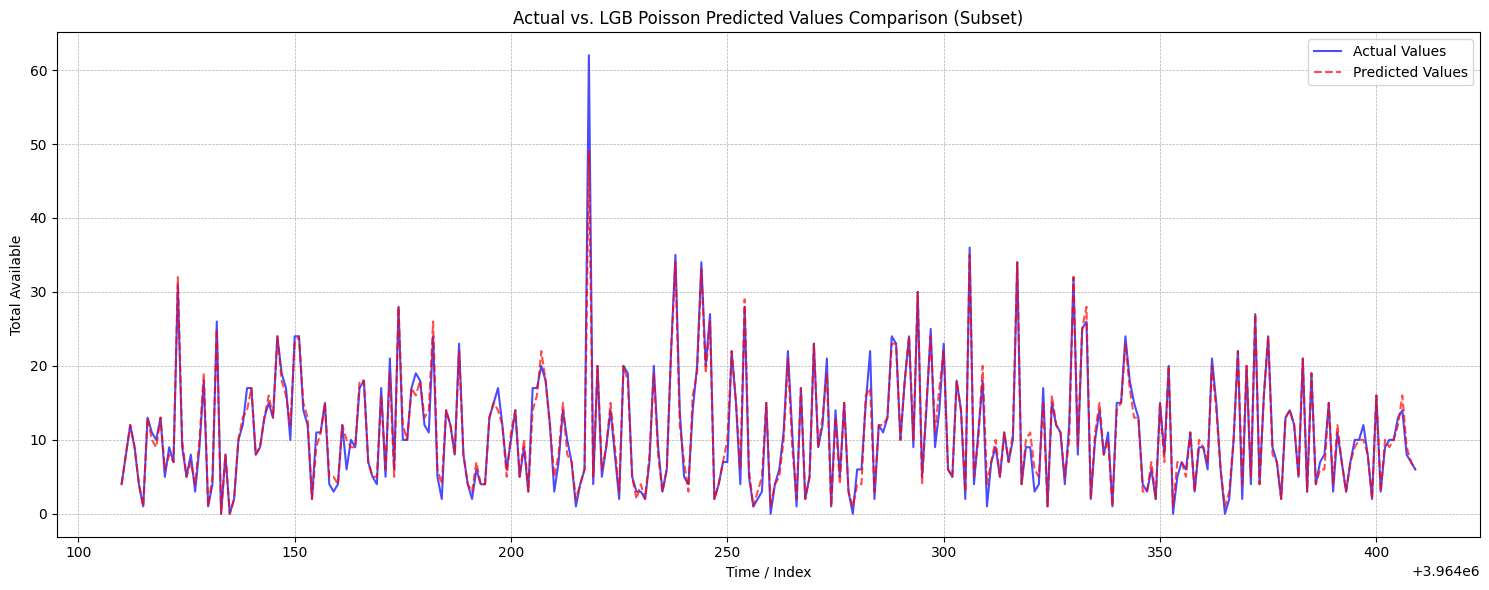

In [54]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. LGB Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [55]:
# Create DMatrix objects, enabling categorical support
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define parameters
# Note: some params like 'num_boost_round' are passed to train()
params = {
    'objective': 'count:poisson', # Or 'binary:logistic', 'multi:softprob'
    'eval_metric': 'mae',           # Monitor MAE
    'tree_method': 'hist',
    'enable_categorical': True,    # If using categoricals
    'learning_rate': 0.05,
    'max_depth': 5,                # XGBoost often uses depth, not num_leaves directly
    'subsample': 0.9,              # Similar to bagging_fraction
    'colsample_bytree': 0.9,       # Similar to feature_fraction
    'random_state': 42,
    'n_estimators': 400,           # Adjust as needed, potentially based on early stopping
    'n_jobs': -1
}

# Specify datasets for watching performance during training
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Train the model
num_boost_round = 100 # Equivalent to n_estimators
bst = xgb.train(params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=watchlist,
                early_stopping_rounds=10, # Optional
               )

# Predict (use best iteration if early stopping was used)
best_iteration = bst.best_iteration if hasattr(bst, 'best_iteration') else num_boost_round
float_predictions = bst.predict(dtest, iteration_range=(0, best_iteration))

# *** You might STILL round this final rate if a strict integer count is needed ***
final_xgb_poisson_predictions = np.round(float_predictions).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_xgb_poisson_predictions = np.maximum(0, final_xgb_poisson_predictions)

c:\Users\pc\anaconda3\envs\stenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [20:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "enable_categorical", "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-mae:7.53809	eval-mae:6.43909
[1]	train-mae:7.39056	eval-mae:6.31162
[2]	train-mae:7.23387	eval-mae:6.17410
[3]	train-mae:7.07992	eval-mae:6.03956
[4]	train-mae:6.92882	eval-mae:5.90816
[5]	train-mae:6.78052	eval-mae:5.77980
[6]	train-mae:6.63502	eval-mae:5.65431
[7]	train-mae:6.49238	eval-mae:5.53183
[8]	train-mae:6.36288	eval-mae:5.42384
[9]	train-mae:6.22590	eval-mae:5.30740
[10]	train-mae:6.09186	eval-mae:5.19381
[11]	train-mae:5.96070	eval-mae:5.08316
[12]	train-mae:5.84261	eval-mae:4.98667
[13]	train-mae:5.71694	eval-mae:4.88133
[14]	train-mae:5.59418	eval-mae:4.77890
[15]	train-mae:5.47454	eval-mae:4.67952
[16]	train-mae:5.35772	eval-mae:4.58282
[17]	train-mae:5.24391	eval-mae:4.48890
[18]	train-mae:5.13287	eval-mae:4.39753
[19]	train-mae:5.02473	eval-mae:4.30890
[20]	train-mae:4.92849	eval-mae:4.23249
[21]	train-mae:4.82562	eval-mae:4.14835
[22]	train-mae:4.72539	eval-mae:4.06658
[23]	train-mae:4.62804	eval-mae:3.98725
[24]	train-mae:4.53339	eval-mae:3.91035
[25]	train

In [56]:
final_xgb_poisson_predictions[:20]

array([ 5,  8, 12,  9,  5,  2, 13, 11, 10, 12,  6,  8,  8, 30, 10,  6,  8,
        5, 10, 18])

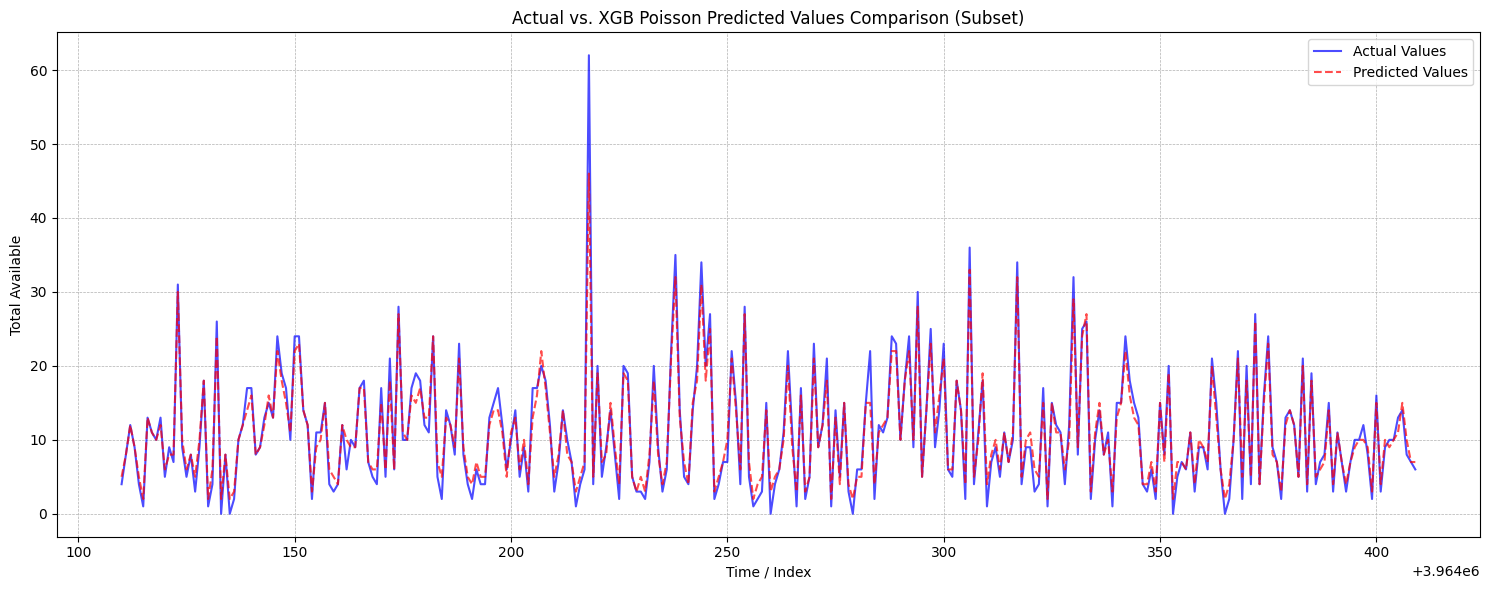

In [57]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_xgb_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. XGB Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [58]:
print(f"Mode of labels in training data: {y_train.mode(dropna=True)}")
print(f"total_count of training labels: {len(y_train)}")
print(f"count of 0 in training labels: {len(y_train[y_train==0])}")
print(f"count of 3 in training labels: {len(y_train[y_train==3])}")
print(f"mode of y_train {y_train.mode()}")

Mode of labels in training data: 0    3
Name: total_available, dtype: int64
total_count of training labels: 3964110
count of 0 in training labels: 96013
count of 3 in training labels: 262487
mode of y_train 0    3
Name: total_available, dtype: int64


In [63]:
print(f"frequency of 0 in y_test {(y_test==0).mean():.3%}")
print(f"frequency of 0 in normal reg predictions {(final_predictions==0).mean():.3%}")

frequency of 0 in y_test 1.726%
frequency of 0 in normal reg predictions 0.409%


In [64]:
print(f"frequency of 0 in y_test {(y_test==0).mean():.3%}")
print(f"frequency of 0 in LGBM poisson predictions {(final_poisson_predictions==0).mean():.3%}")

frequency of 0 in y_test 1.726%
frequency of 0 in LGBM poisson predictions 0.062%


In [65]:
print(f"frequency of 0 in y_test {(y_test==0).mean():.3%}")
print(f"frequency of 0 in XGB poisson predictions {(final_xgb_poisson_predictions==0).mean():.3%}")

frequency of 0 in y_test 1.726%
frequency of 0 in XGB poisson predictions 0.000%


In [66]:
# Get float predictions (e.g., from the original regression model or poisson/tweedie)
# predictions_float = gbm.predict(X_test, num_iteration=gbm.best_iteration) # Or gbm_poisson.predict(...)
actual_zeros_mask = (y_test == 0)
predictions_for_actual_zeros = predictions[actual_zeros_mask]
print("Predictions when actual was 0:")
print(pd.Series(predictions_for_actual_zeros).describe().round(3))
# Are predictions here consistently >= 0.5? Or are they < 0.5 but maybe rounding wasn't applied?

Predictions when actual was 0:
count    3602.000
mean        1.551
std         1.429
min        -0.362
25%         0.716
50%         1.136
75%         2.057
max        14.179
dtype: float64
